# Exploratory Data Analysis


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
ECLSK2011 = pd.read_csv('ECLSK2011.csv')

#Dropping the rows with missing math scores
ECLSK2011 = ECLSK2011.dropna(axis=1, how='all')
missing_math_rows = ECLSK2011[ECLSK2011.groupby('CHILDID')['MATH'].transform(lambda x: any(x.isna()))]

ECLSK2011 = ECLSK2011.drop(missing_math_rows.index)

In [ ]:
#0: None
#1: 8TH GRADE OR BELOW
#2: 9TH - 12TH GRADE
#3: HIGH SCHOOL DIPLOMA/EQUIVALENT
#4: VOC/TECH PROGRAM
#5: SOME COLLEGE
#6: BACHELOR'S DEGREE
#7: GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE
#8: MASTER'S DEGREE
#-9: NOT ASCERTAINED

In [3]:
ECLSK2011_filtered = ECLSK2011[['TIME', 'MATH', 'DADED', 'MOMED']]

unique_daded = ECLSK2011_filtered['DADED'].unique()
unique_momed = ECLSK2011_filtered['MOMED'].unique()

a = len(unique_daded)
b = len(unique_momed)

fig, axes = plt.subplots(a, b, figsize=(150, 150))

for i, daded in enumerate(unique_daded):
    for j, momed in enumerate(unique_momed):
        ax = axes[i, j]
        data_subset = ECLSK2011_filtered[(ECLSK2011_filtered['DADED'] == daded) & (ECLSK2011_filtered['MOMED'] == momed)]
        ax.scatter(data_subset['TIME'], data_subset['MATH'], marker='o')
        ax.set_title(f"DADED: {daded}, MOMED: {momed}")
        ax.set_xlabel('TIME')
        ax.set_ylabel('MATH')

plt.tight_layout()

plt.show()

C:\Users\Evan Edwards\AppData\Local\Temp\ipykernel_12152\2510010298.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(group['TIME'], group['MATH'], c=colors[daded_value], label=f'DADED {daded_value}')
C:\Users\Evan Edwards\AppData\Local\Temp\ipykernel_12152\2510010298.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(group['TIME'], group['MATH'], c=colors[daded_value], label=f'DADED {daded_value

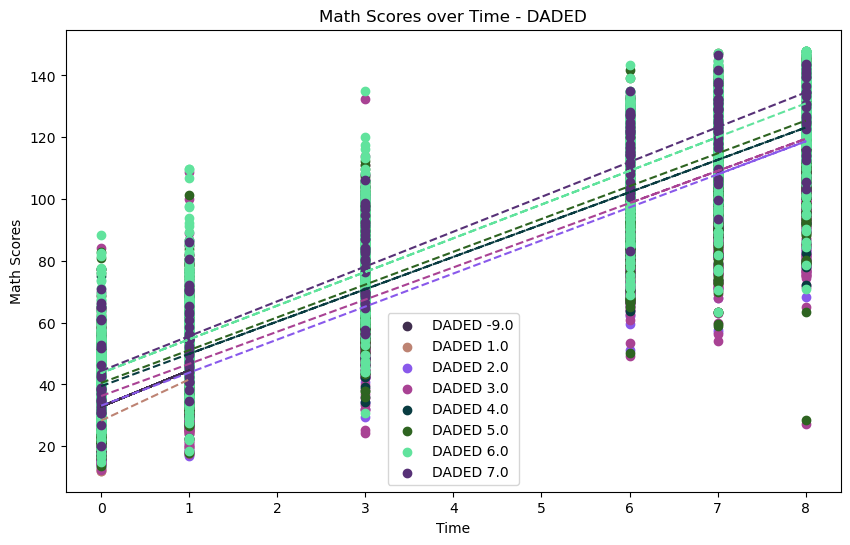

In [4]:
unique_values = ECLSK2011['DADED'].unique()

colors = {}
for value in unique_values:
    colors[value] = np.random.rand(3,)


plt.figure(figsize=(10, 6))
for daded_value, group in ECLSK2011.groupby('DADED'):
    plt.scatter(group['TIME'], group['MATH'], c=colors[daded_value], label=f'DADED {daded_value}')
    x = group['TIME'].values.reshape(-1, 1)
    y = group['MATH'].values.reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)

    plt.plot(group['TIME'], y_pred, color=colors[daded_value], linestyle='--')
    

    
plt.xlabel('Time')
plt.ylabel('Math Scores')
plt.title('Math Scores over Time - DADED')
plt.legend()
plt.show()

C:\Users\Evan Edwards\AppData\Local\Temp\ipykernel_12152\87031216.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(group['TIME'], group['MATH'], c=colors[momed_value], label=f'MOMED {momed_value}')
C:\Users\Evan Edwards\AppData\Local\Temp\ipykernel_12152\87031216.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(group['TIME'], group['MATH'], c=colors[momed_value], label=f'MOMED {momed_value}')
C:

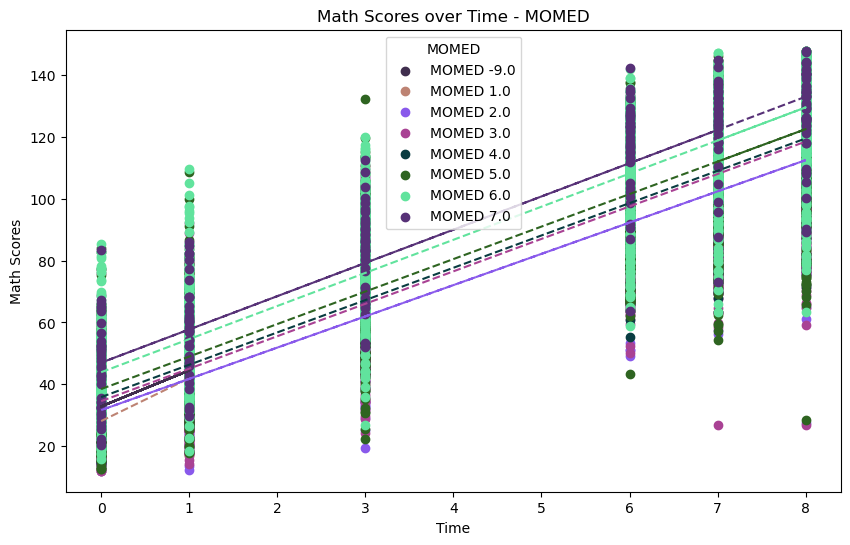

In [5]:
unique_values = ECLSK2011['MOMED'].unique()

plt.figure(figsize=(10, 6))
for momed_value, group in ECLSK2011.groupby('MOMED'):
    plt.scatter(group['TIME'], group['MATH'], c=colors[momed_value], label=f'MOMED {momed_value}')

    x = group['TIME'].values.reshape(-1, 1)
    y = group['MATH'].values.reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)

    plt.plot(group['TIME'], y_pred, color=colors[momed_value], linestyle='--')

plt.xlabel('Time')
plt.ylabel('Math Scores')
plt.title('Math Scores over Time - MOMED')
plt.legend(title='MOMED')
plt.show()